In [1]:
import torch
import torch.nn as nn
from model import NewUNet
import matplotlib.pyplot as plt
import torch.nn.functional as F

from data_loading import load_data
from data_visualization import plot_pair

In [2]:
model = NewUNet()
model.load_state_dict(torch.load('models/model_EP_100_LR_0.01_MOM_0.99_BS_2.pth'))
model.eval()

NewUNet(
  (down_block_1): DownBlock(
    (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (down_block_2): DownBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (down_block_3): DownBlock(
    (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(256, 256, kernel_size=(3, 3),

In [3]:
train_loader, test_loader = load_data(batch_size=1, n_train=0.8, n_test=0.2)
img, mask = next(iter(test_loader))

In [4]:
output = model(img).detach()
output.shape

torch.Size([1, 2, 512, 512])

In [5]:
output = output.round()

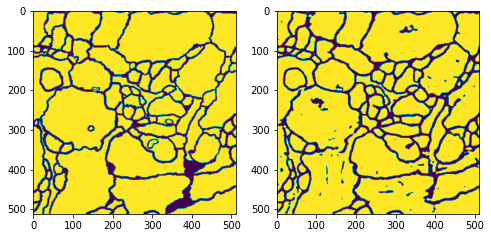

In [6]:
plot_pair(mask[0], output[0,1])